In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [6]:
df_original = pd.read_csv('iris-data-clean.csv')

In [7]:
df_original.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df_original.drop(['class'], axis=1)

In [9]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


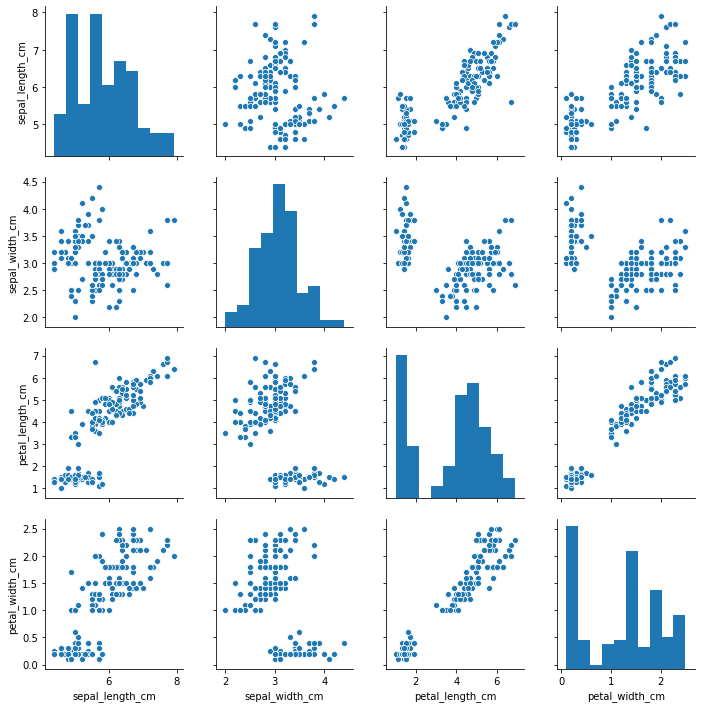

In [10]:
sns.pairplot(df)

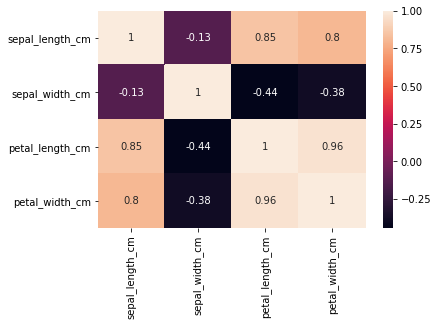

In [14]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Petal lenght and Petal width are extremely correlated, so we want to keep only: PCA to answer this question

### PCA analysis 

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

In [17]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.components_

array([[ 0.34477194, -0.08812093,  0.8616781 ,  0.36177047],
       [ 0.69712562,  0.69065636, -0.18137175, -0.06414013]])

In [19]:
pca.explained_variance_ratio_

array([0.921582  , 0.05358636])

In [20]:
df_pca = pca.transform(df)

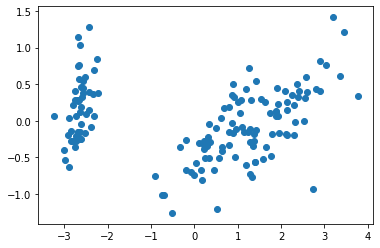

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df_pca[:,0], df_pca[:,1])

In [ ]:
# Pretty confidence about our model so far

In [26]:
model_3 = KMeans(n_clusters=3)

In [27]:
model_2 = KMeans(n_clusters=2)

In [38]:
model_4 = KMeans(n_clusters=4)

In [39]:
model_2.fit(df_pca)
model_3.fit(df_pca)
model_4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
model_2.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

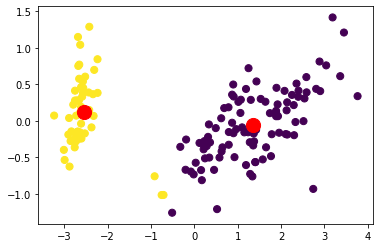

In [43]:
y_kmeans = model_2.predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1);

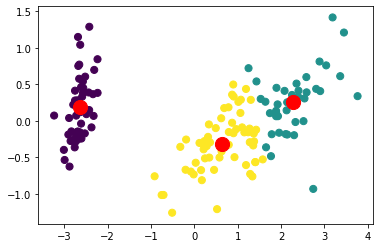

In [42]:
y_kmeans = model_3.predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1);

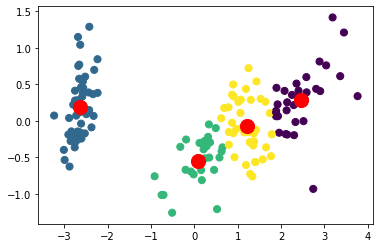

In [41]:
y_kmeans = model_4.predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model_4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1);

In [44]:
model_2.inertia_

133.04335924250563

In [45]:
model_3.inertia_

62.14149084813505

In [46]:
model_4.inertia_

41.040648401244226